In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from skimage import io, color, filters
from scipy.ndimage import gaussian_filter, convolve
from PIL import Image

In [2]:
image = io.imread('rover.jpg')
gray_image = color.rgb2gray(image)

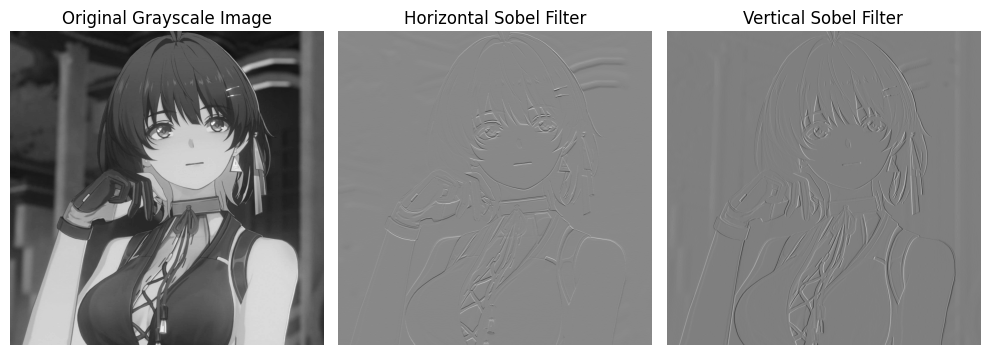

In [15]:
# 7. 

# Apply a horizontal Sobel filter on an image
sobel_horizontal = filters.sobel_h(gray_image)
sobel_vertical = filters.sobel_v(gray_image)

# Plot the result of horizontal Sobel filter
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Horizontal Sobel Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Vertical Sobel Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

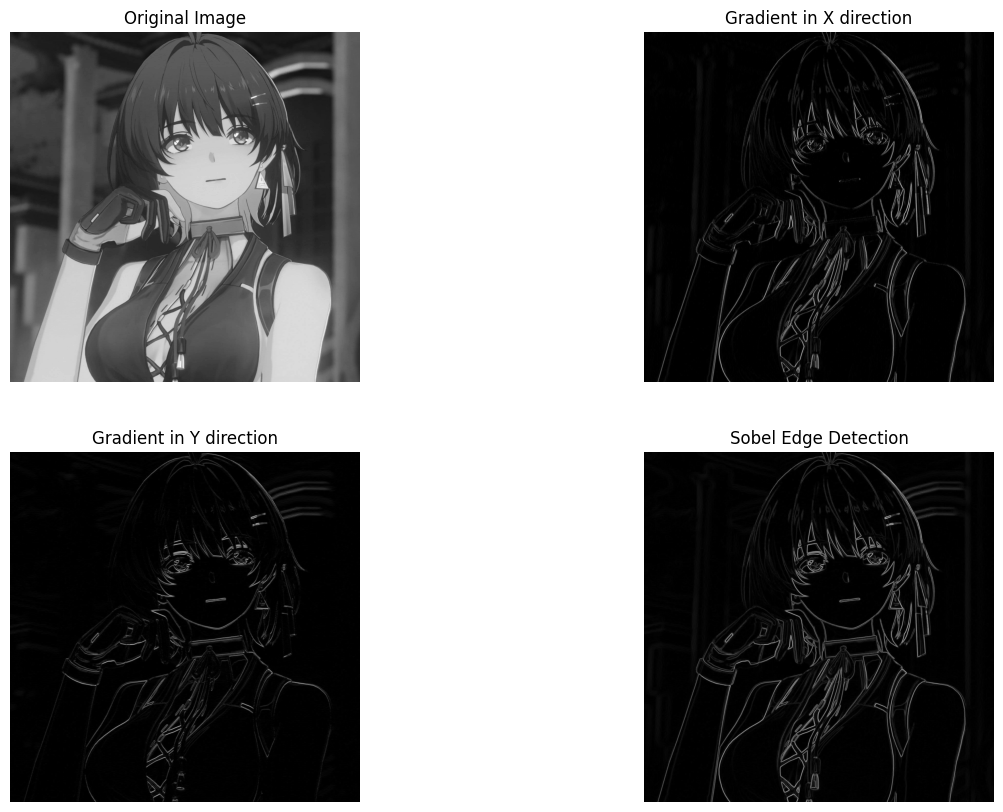

In [9]:
#8.
# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Sobel operators
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

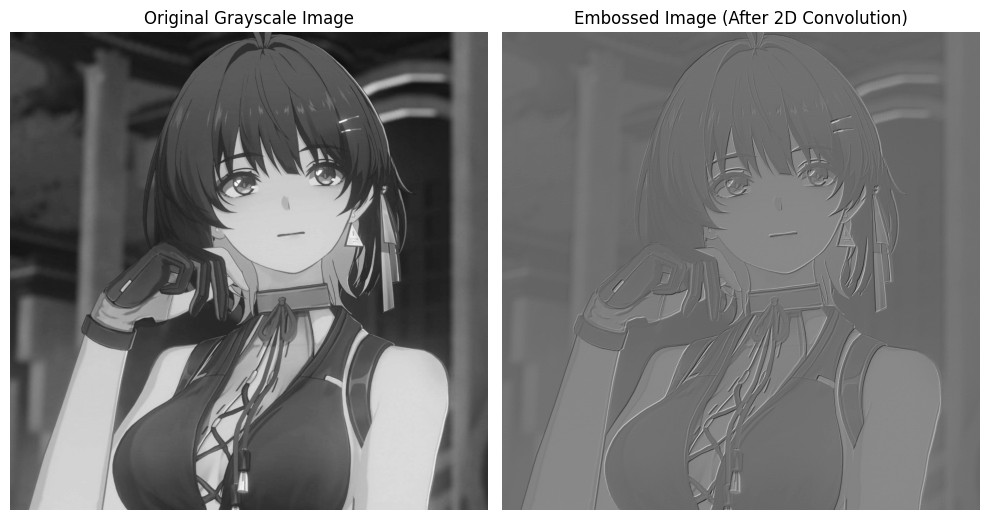

In [10]:
# 9. 

#Perform 2D convolution with an emboss filter on an image

# Define an emboss kernel (2D convolution filter)
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Perform 2D convolution using the emboss filter
embossed_image = signal.convolve2d(gray_image, emboss_kernel, mode='same', boundary='symm')

# Plot original and embossed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(embossed_image, cmap='gray')
plt.title('Embossed Image (After 2D Convolution)')
plt.axis('off')

plt.tight_layout()
plt.show()

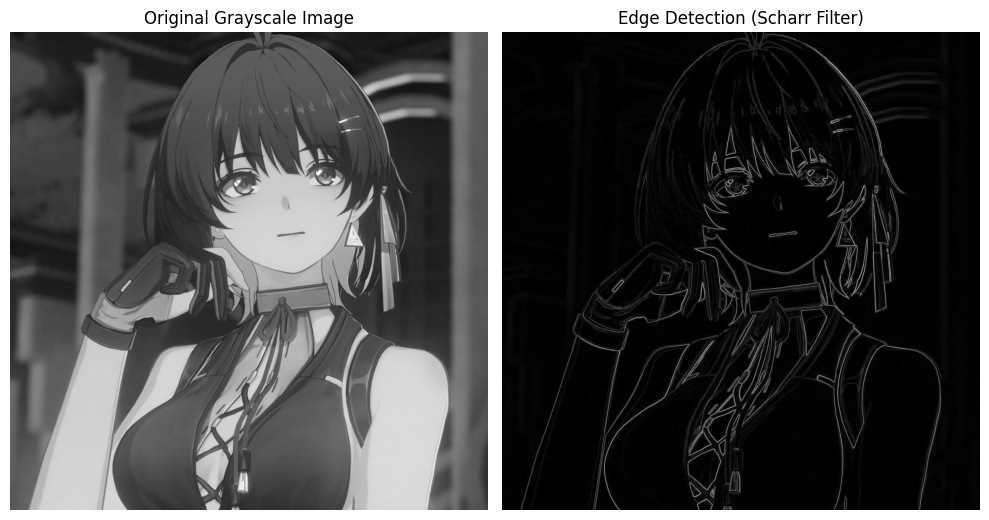

In [22]:
# 10. 

#Apply Scharr filter for edge detection (2D convolution)
# Scharr filter is a more accurate edge detection filter than Sobel for gradients

# Perform edge detection using Scharr filter
edges_scharr = filters.scharr(gray_image)

# Plot the edge-detected image using Scharr filter
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_scharr, cmap='gray')
plt.title('Edge Detection (Scharr Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()